In [7]:
# initial setup for any notebook

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/yarcoh/projects/thesis-code4") # go to parent dir

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# imports

from src.deep.model_analyzer_src import ModelAnalyzer
from src.deep.data_loaders import DatasetNormal
from src.deep.models import *
from src.deep.trainers import Trainer

from tqdm.notebook import tqdm


In [9]:
# configs
model_name = 'mu-0.125__8000ds__UnetWithSkips__51epochs'
trained_model_path = '/data/yarcoh/thesis_data/data/prod_models/'+model_name
dataset_mu = 0.242
datasetpath = f'/data/yarcoh/thesis_data/data/datasets/qam16_100001x20/100001_samples_mu={dataset_mu}'

In [10]:
# load trainer from file
trainer: Trainer = Trainer.load3(trained_model_path)
ma: ModelAnalyzer = ModelAnalyzer(trainer,model_name)
ma.load_test_dataset(datasetpath, 0.05, 0.03, 0.92)

/home/yarcoh/projects/thesis-code4/src/deep/data_loaders.py:295: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484808560/work/torch/csrc/utils/tensor_new.cpp:201.)
  t = torch.Tensor([np_vec.real, np_vec.imag])


In [11]:
print(len(trainer.val_dataset))

92000


In [12]:
print(trainer.val_dataset.config)
mqam = trainer.val_dataset.config.get('m_qam')

{'m_qam': 16, 'num_symbols': 64, 'normalization_factor': 0.24210526315789474, 'dt': 1, 'ssf': {'b2': -2e-26, 'gamma': 0.003, 't0': 1.25e-10, 'dt': 1, 'z_n': 1000000.0, 'h': 200}, 'data_type': 0}


In [13]:
# this part doesnt seem to be essential anymore

# print('paths before:')
# print(trainer.train_dataset.data_dir_path)
# trainer.fix_datasets_paths(new_dataset_path='../../data/datasets', verbose=False)
# print('paths after:')
# print(trainer.train_dataset.data_dir_path)

/home/yarcoh/miniconda3/envs/thesis-code/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


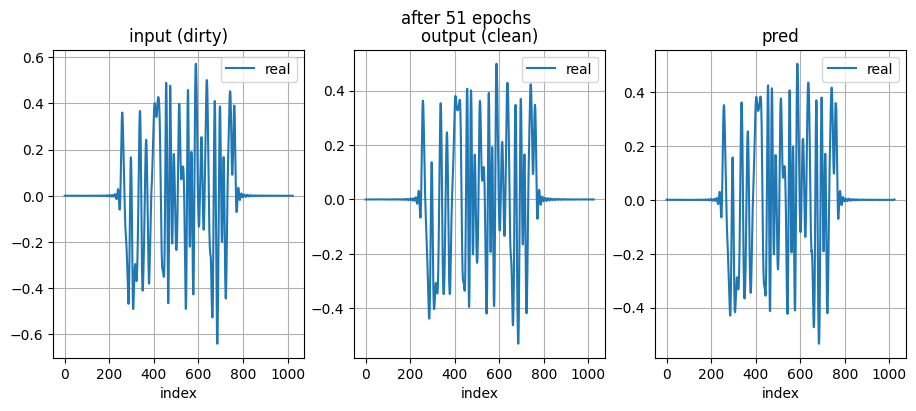

In [14]:
ma.plot_single_item(1)

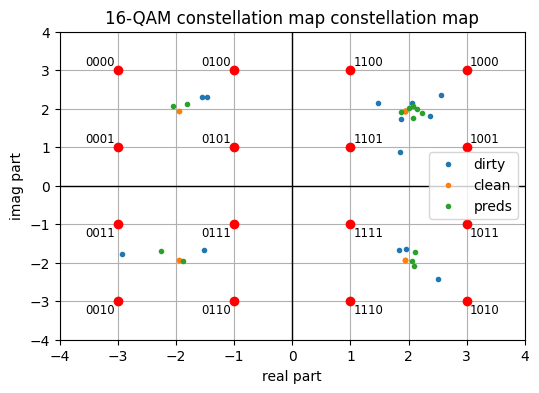

In [15]:
ma.plot_constelation(1)

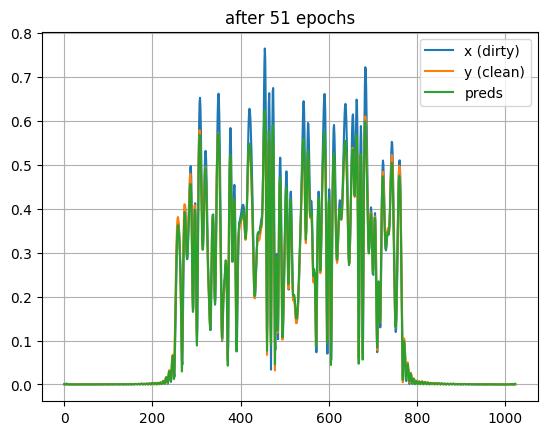

In [16]:
ma.plot_single_item_together(1)

In [17]:
x_power_i, y_power, pred_power = ma.calc_norms(_tqdm=tqdm, verbose_level=1, max_items=10000)
print(f'x_power: {x_power_i}\ny_power: {y_power}\npred_power: {pred_power}')

  0%|          | 0/10000 [00:00<?, ?it/s]

x_power: 75.72082024917528
y_power: 66.29412082748487
pred_power: 66.63822258300927


In [18]:
ma.upload_single_item_plots_to_wandb(1)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: yarden92. Use `wandb login --relogin` to force relogin


In [19]:
ma.plot_bers(_tqdm=tqdm, verbose_level=1)

  0%|          | 0/92000 [00:00<?, ?it/s]

In [ ]:
ma.upload_bers_to_wandb()

In [ ]:
# print model's architecture
# TODO - make sure every model has this method (make abstract model class that all inherit from)
# trainer.model.print_architecture

# THE END

In [ ]:
# # paper 1 model analyzer
# path_init = '../../data/test_models/mu-0.008__128ds__PaperNNforNFTmodel__3epochs'

# trainer_real = Trainer.load3(path_init + '__real')
# trainer_imag = Trainer.load3(path_init + '__imag')

# train_ds = SingleMuDataSet(trainer_real.train_dataset.data_dir_path,
#                            trainer_real.train_dataset.data_indices)
# val_ds = SingleMuDataSet(trainer_real.val_dataset.data_dir_path,
#                          trainer_real.val_dataset.data_indices)

# model = PaperNNforNFTwrapper(trainer_real.model, trainer_imag.model)

# trainer = Trainer(
#     train_dataset=train_ds,
#     val_dataset=val_ds,
#     model=model,
#     device=trainer_real.device,
#     batch_size=trainer_real.train_dataloader.batch_size,
#     l_metric=trainer_real.l_metric,
#     optim=trainer_real.optim,
#     params=trainer_real.params)

In [ ]:
# analyze on the whole dataset

# attach new dataset to trainer


In [ ]:
trainer.params

In [ ]:
ma = ModelAnalyzer(trainer)

In [ ]:
ma.plot_single_item(i=0)

In [ ]:
ma.plot_bers(_tqdm=tqdm)